In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def import_package(depth: int, is_jupyter: bool):
    if is_jupyter is False:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    else:
        current_dir = os.getcwd()

    parent_dir = current_dir
    while depth > 0:
        depth -= 1
        parent_dir = os.path.dirname(parent_dir)
    print(current_dir)
    print(parent_dir)
    sys.path.insert(0, parent_dir)

import_package(1, True)

/Users/nguyenhuyhai/20212/applyStatistic/midterm_project/instacart-market-basket-analysis
/Users/nguyenhuyhai/20212/applyStatistic/midterm_project


In [3]:
departments= pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
departments #Mabe we do not use this

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
order_products__prior #2

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [6]:
order_products__train #2

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [7]:
orders #1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [8]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [9]:
sample_submission

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
...,...,...
74995,3420740,39276 29259
74996,3420877,39276 29259
74997,3420888,39276 29259
74998,3420989,39276 29259


## Explain

In [10]:
"""
Goal:
The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.
For each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order

-Table: orders
    +order_id: id of order (PK)
    +user_id: id of user
    +eval_set: Type of customer (prior, train, test)
        In this dataset, 4 to 100 orders of a customer are given (we will look at this later) and we need to predict the products that will be re-ordered. 
        ->So the last order of the user has been taken out and divided into train and test sets

        ++prior: prior orders dataset  
        ++train: train dataset of the last order
        ++test: test dataset of the last order

    +order_number: number of order
    +order_dow: order in day of week(from 0 -> 6) <But we don't know which values represent which day
    +order_hour_of_day: order in  hour of a day (0->23) 
    +days_since_prior_order: Day that people buy again

-Table: order_products__train: information about train order
    +order_id: id of order
    +product_id: id of product
    +PK: order_id + product_id
    +add_to_cart_order: number of product of that order that people add to cart(buy)
    +reordered: Is that order 

-Table: order_product_prior: information about prior order

-Table: product: product information
    product_id(PK)
    product_name
    aisle_id
    department_id
"""

"\nGoal:\nThe dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.\nFor each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order\n\n-Table: orders\n    +order_id: id of order (PK)\n    +user_id: id of user\n    +eval_set: Type of customer (prior, train, test)\n        In this dataset, 4 to 100 orders of a customer are given (we will look at this later) and we need to predict the products that will be re-ordered. \n        ->So the last order of the user has been taken out and divided into train and test sets\n\n        ++prior: prior orders dataset  \n        ++train: train dataset of the last order\n        ++test: test dataset of the last order\n\n    +order_number: number of order\n    +order_dow: order in day of week(from 0 -> 6) <But we don't know which values represent which day\n    +order_hour_of_day: order in  hour of a day (0->23) \n    +days_since_prior_order: Day tha

## EDA

In [11]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [12]:
for i in range(len(orders.columns)): #Check the percetntage of Nan
    missing_data = orders[orders.columns[i]].isna().sum()
    perc = missing_data / len(orders[orders.columns[i]]) * 100
    print(str(orders.columns[i])+' has missing entries: %d, which is %.2f percent of total' % (missing_data, perc))

order_id has missing entries: 0, which is 0.00 percent of total
user_id has missing entries: 0, which is 0.00 percent of total
eval_set has missing entries: 0, which is 0.00 percent of total
order_number has missing entries: 0, which is 0.00 percent of total
order_dow has missing entries: 0, which is 0.00 percent of total
order_hour_of_day has missing entries: 0, which is 0.00 percent of total
days_since_prior_order has missing entries: 206209, which is 6.03 percent of total


In [13]:
color = sns.color_palette()


/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


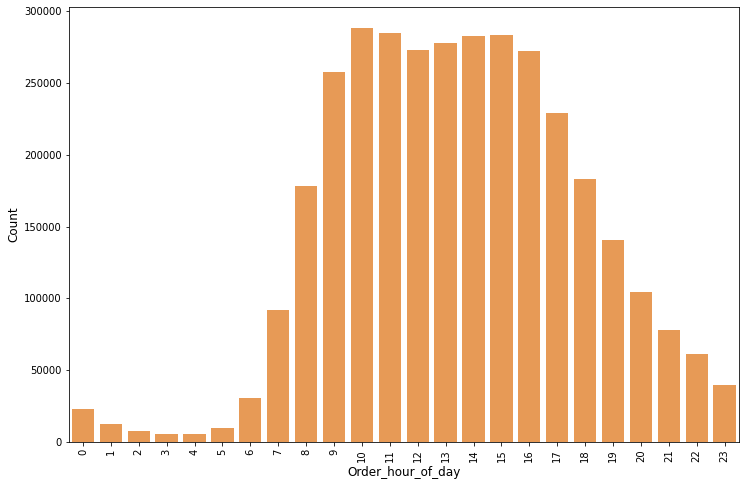

In [14]:
cnt_srs = orders.order_hour_of_day.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Order_hour_of_day', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
#Most often order from 8 -> 18

/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


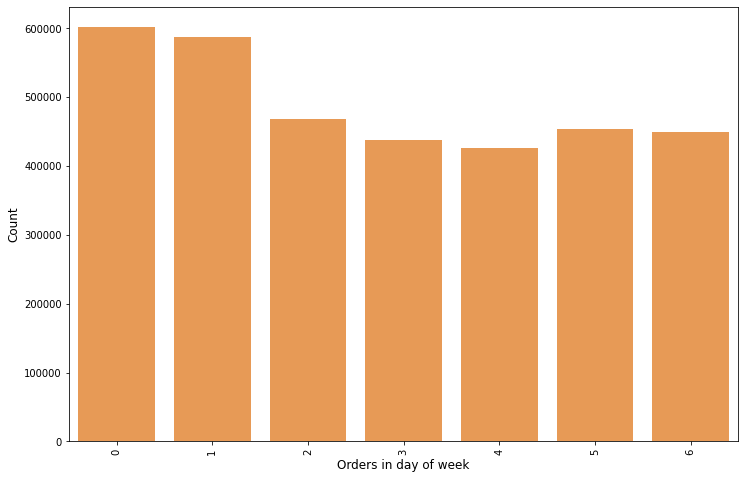

In [16]:
cnt_srs = orders.order_dow.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Orders in day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
# Day 0 and Day 1 is max

In [18]:
cnt_srs = orders.b.value_counts()

plt.figure(figsize=(25,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'b'

In [19]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
#There always at least 3 prior orders

/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


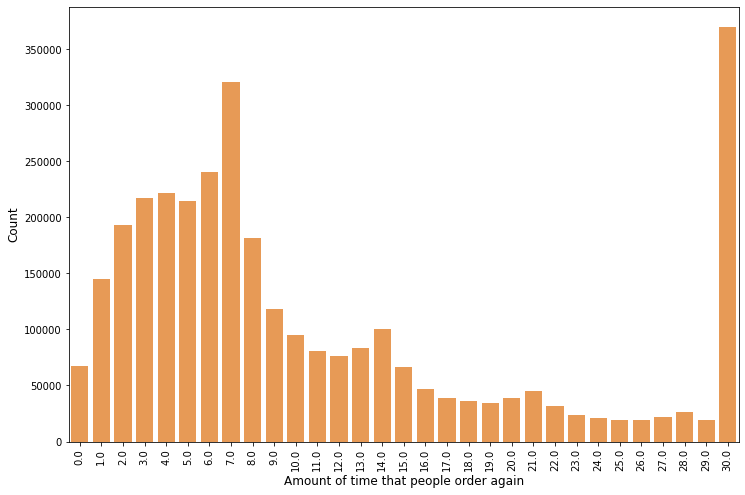

In [20]:
cnt_srs = orders.days_since_prior_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Amount of time that people order again', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

People tends to buy things after 1 week, small peak at 14, 21, 28 days

### order_products__prior

In [21]:
order_products__prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [22]:
# percentage of re-orders in prior set #
order_products__prior.reordered.sum() / len(order_products__prior)

0.5896974667922161

In [23]:
def encode_units(x): #decode unit
    if x <= 0:
        return 0
    if x >= 1: 
        return 1 

In [24]:

# percentage of no re-orders products
grouped_df = order_products__prior.groupby("order_id")["reordered"].aggregate("sum").reset_index() #groupby order_id by sum
grouped_df.reordered = grouped_df.reordered.map(encode_units) #apply mapping encode_units that reordered product is 1, non reordered product is 0

grouped_df.reordered.value_counts() / len(grouped_df) #calculate percentage of no re-orders products

1    0.879151
0    0.120849
Name: reordered, dtype: float64

/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


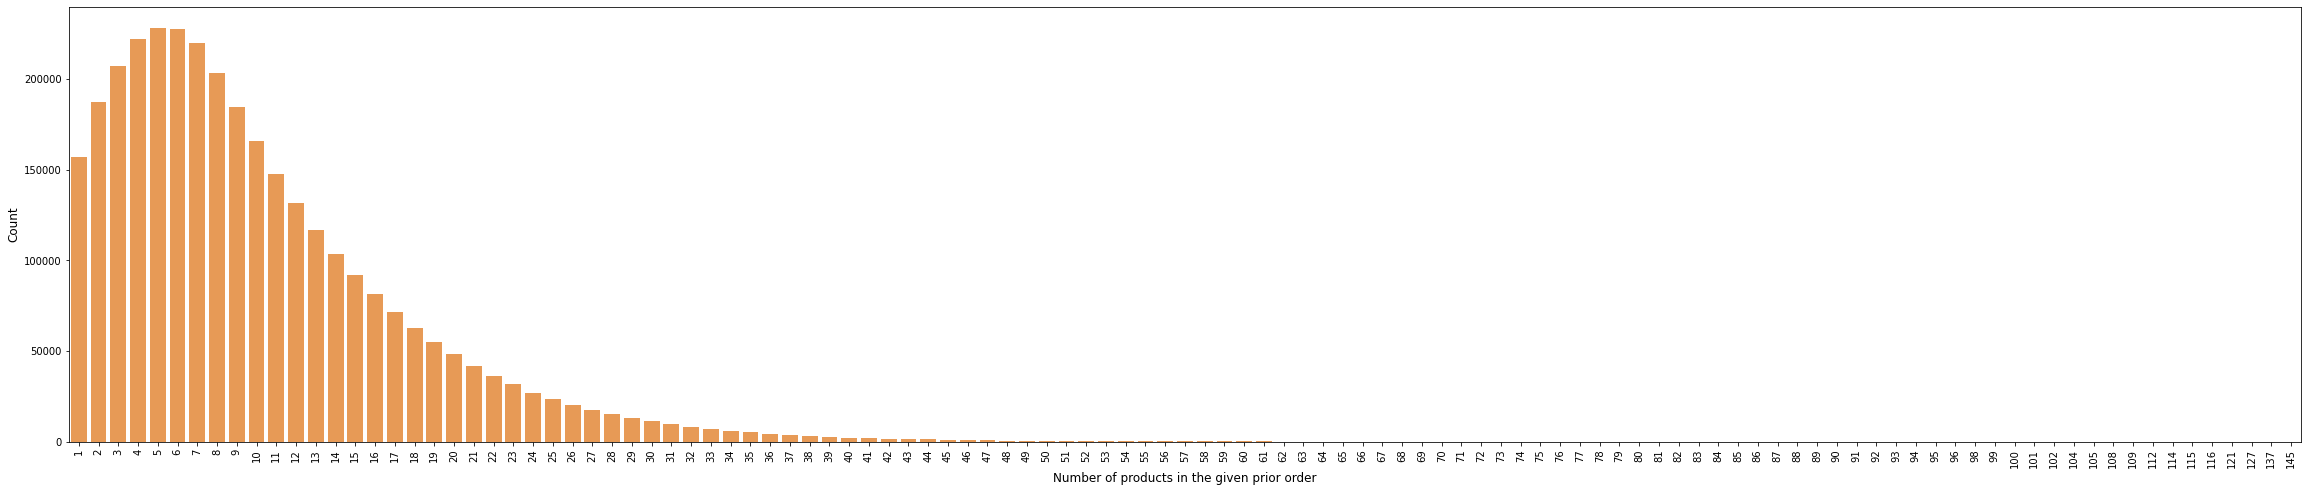

In [25]:
grouped_df = order_products__prior.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index() # groupby order_id by max

cnt_srs = grouped_df.add_to_cart_order.value_counts() #count the appearance of each element

plt.figure(figsize=(40,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of products in the given prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
order_products__train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [27]:
# percentage of re-orders in prior set #
order_products__train.reordered.sum() / len(order_products__train)

0.5985944127509629

In [28]:

# percentage of no re-orders products
grouped_df = order_products__train.groupby("order_id")["reordered"].aggregate("sum").reset_index() #groupby order_id by sum
grouped_df.reordered = grouped_df.reordered.map(encode_units) #apply mapping encode_units that reordered product is 1, non reordered product is 0

grouped_df.reordered.value_counts() / len(grouped_df) #calculate percentage of no re-orders products

1    0.93444
0    0.06556
Name: reordered, dtype: float64

/Users/nguyenhuyhai/opt/anaconda3/envs/Sea/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


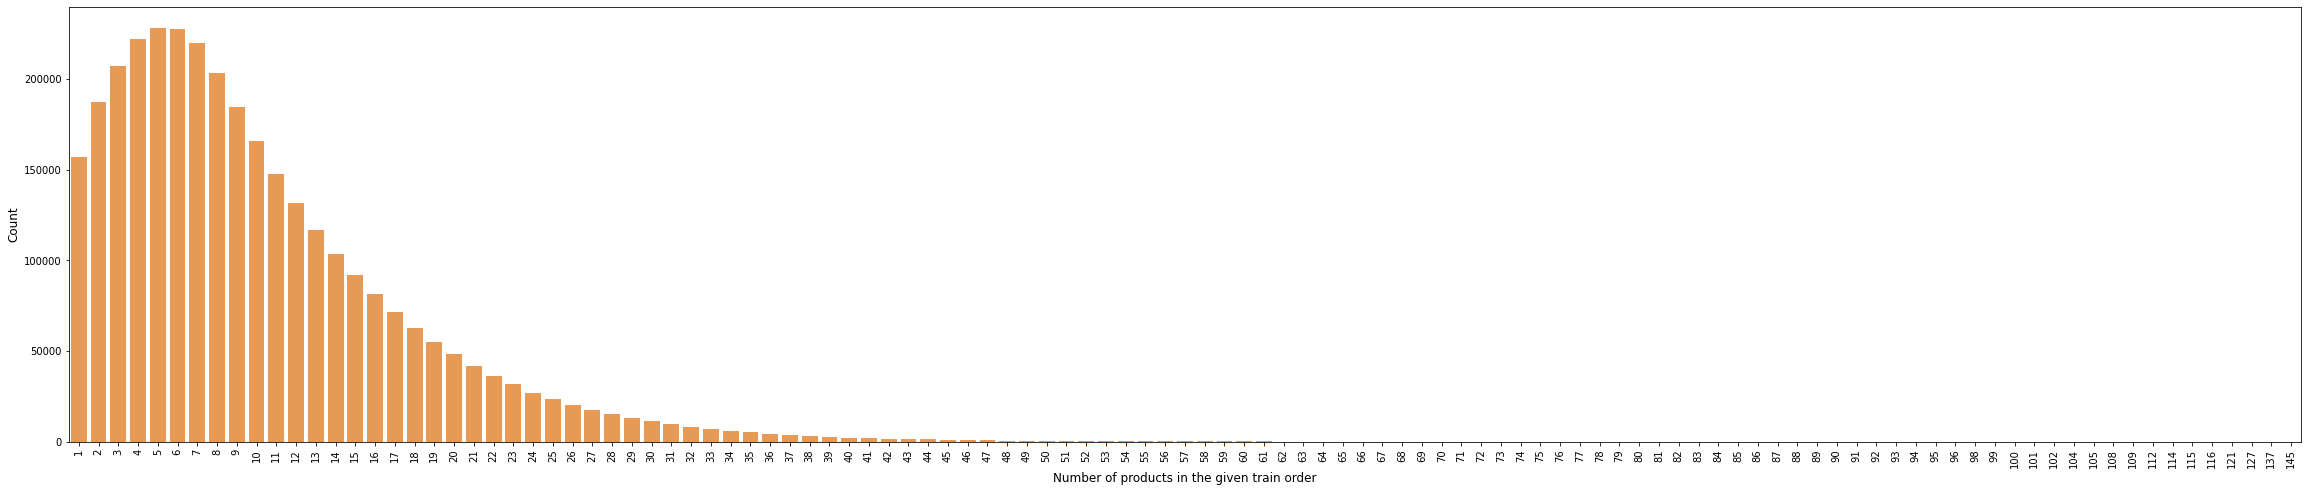

In [29]:
grouped_df = order_products__prior.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()

cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(40,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of products in the given train order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
order_products__train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [32]:
order_products__prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [ ]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
order_products__train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
